#Load data

In [1]:
# Mount Google Drive locally
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_pickle("/content/drive/My Drive/liveProject/mortgage_data_balanced.pkl.gz")

#Deliverable 1. Implement Disparate Impact

In [3]:
def DispImpact(pred, group_a, group_b):
  ### Disparate Impact
  SR_A = pred[group_a==1].mean() # success rate group A
  SR_B = pred[group_b==1].mean() # success rate group B
  return SR_A/SR_B

#Deliverable 2. Implement 2-SD Rule

In [28]:
def TwoSDRule(pred, group_a, group_b):
    import numpy as np

    ### 2-SD Rule
    SR_A = pred[group_a==1].mean() # success rate group A
    SR_B = pred[group_b==1].mean() # success rate group B
    SR_T = pred.mean() # success rate total
    P_min = (group_a==1).mean() # minority proportion - usually group A
    N = len(pred) # sample size
    return (SR_A - SR_B)/np.sqrt( (SR_T * (1.0 - SR_T))/(N * P_min * (1 - P_min)))

#Deliverable 3. Income-based classifier, metrics and charts

In [36]:
import numpy as np

# creating three threshold-based classifiers
df[['log(applicant_income_000s)']] = np.log(df['applicant_income_000s'].copy())
pred_35 = df['log(applicant_income_000s)'].copy() > 3.5
pred_43 = df['log(applicant_income_000s)'].copy() > 4.3
pred_50 = df['log(applicant_income_000s)'].copy() > 5.0

In [37]:
# compute metrics
female = (df['applicant_sex_name'] == "Female").copy()
male = (df['applicant_sex_name'] == "Male").copy()

## acceptance rate % across tresholds
### total
accept_rate_35 = pred_35.mean() * 100.0
accept_rate_43 = pred_43.mean() * 100.0
accept_rate_50 = pred_50.mean() * 100.0

### male
accept_rate_male_35 = pred_35[male].mean() * 100.0
accept_rate_male_43 = pred_43[male].mean() * 100.0
accept_rate_male_50 = pred_50[male].mean() * 100.0

### female
accept_rate_female_35 = pred_35[female].mean() * 100.0
accept_rate_female_43 = pred_43[female].mean() * 100.0
accept_rate_female_50 = pred_50[female].mean() * 100.0

## disparate impact across tresholds
DP_35 = DispImpact(pred_35, female, male)
DP_43 = DispImpact(pred_43, female, male)
DP_50 = DispImpact(pred_50, female, male)

## 2-SD rule across tresholds
Z_35 = TwoSDRule(pred_35, female, male)
Z_43 = TwoSDRule(pred_43, female, male)
Z_50 = TwoSDRule(pred_50, female, male)

In [41]:
import seaborn as sns

# chart different thresholds: acceptance rates, disparate impact and 2-SD rule
d = pd.DataFrame({"Threshold": [3.5, 4.3, 5.0],
                  "Total Acceptance Rate": [accept_rate_35, accept_rate_43, accept_rate_50],
                  "Female Acceptance Rate": [accept_rate_female_35, accept_rate_female_43, accept_rate_female_50],
                  "Male Acceptance Rate": [accept_rate_male_35, accept_rate_male_43, accept_rate_male_50],
                  "Disparate Impact": [DP_35, DP_43, DP_50],
                  "2-SD Rule": [Z_35, Z_43, Z_50]}
                 )

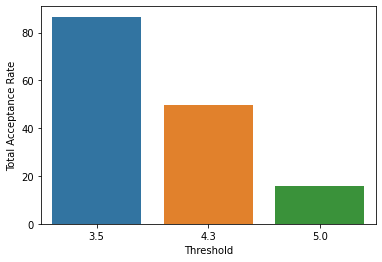

In [42]:
sns.barplot(data=d, x="Threshold", y="Total Acceptance Rate")

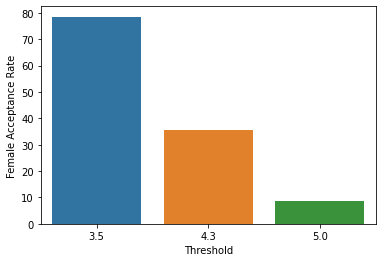

In [43]:
sns.barplot(data=d, x="Threshold", y="Female Acceptance Rate")

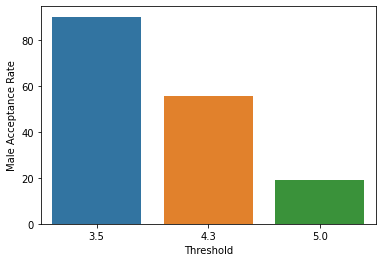

In [44]:
sns.barplot(data=d, x="Threshold", y="Male Acceptance Rate")

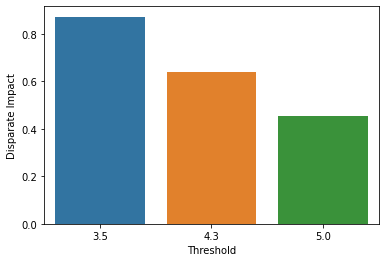

In [45]:
sns.barplot(data=d, x="Threshold", y="Disparate Impact")

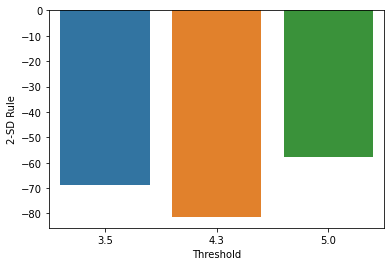

In [46]:
sns.barplot(data=d, x="Threshold", y="2-SD Rule")